pvalue_normal_approx(Binomial(100, 0.5), 60) = 0.04550026389635841
nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
probability of P-value ≤ 5% = 0.055603


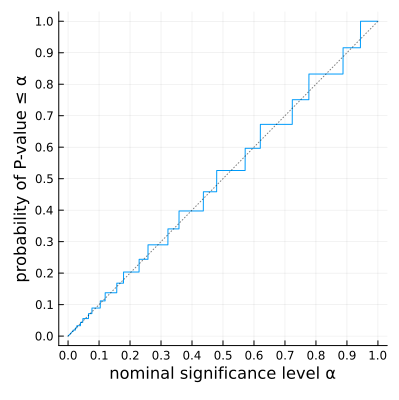

In [1]:
using Distributions
using Optim
using Roots
using StatsBase: ecdf
using StatsPlots
default(fmt=:png)

function pvalue_normal_approx(nulldist, x)
    m, s = mean(nulldist), std(nulldist)
    z = (x - m)/s
    2ccdf(Normal(), abs(z))
end

make_ecdf(Y) = (_ecdf = ecdf(Y); f(x) = _ecdf(x))

function plot_ecdf_pval(F_pval)
    plot(F_pval, 0, 1; label="")
    plot!(identity, 0, 1; label="", ls=:dot, c=:black, alpha=0.5)
    plot!(xtick=0:0.1:1, ytick=0:0.1:1)
    plot!(xguide="nominal significance level α",
        yguide="probability of P-value ≤ α")
    plot!(size=(400, 400))
end

@show pvalue_normal_approx(Binomial(100, 0.5), 60);

@show nulldist = Binomial(100, 1/3)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Binomial(100, 1 / 3) = Binomial{Float64}(n=100, p=0.3333333333333333)
altdist = Binomial(100, 1 / 2) = Binomial{Float64}(n=100, p=0.5)
probability of P-value ≤ 5% = 0.93339


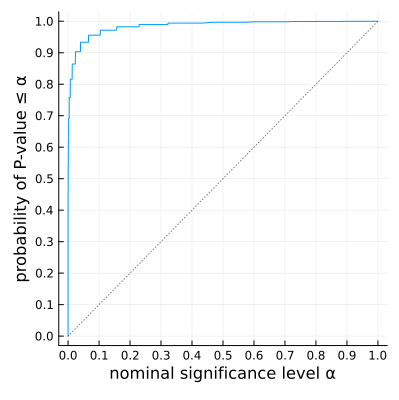

In [2]:
@show nulldist = Binomial(100, 1/3)
@show altdist = Binomial(100, 1/2)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

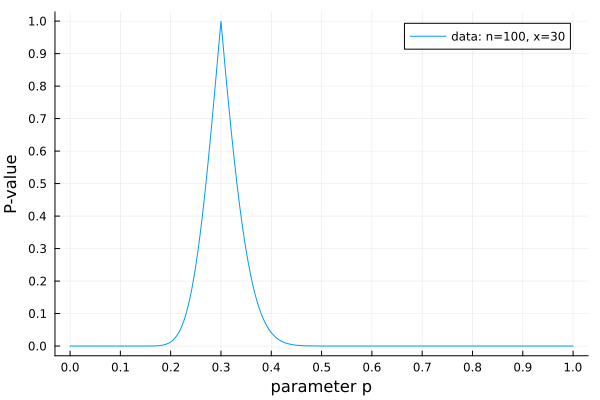

In [3]:
plot(p -> pvalue_normal_approx(Binomial(100, p), 30), 0, 1; label="data: n=100, x=30")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="parameter p", yguide="P-value")

ci95 = [0.2189488529493276, 0.39584854633346667]


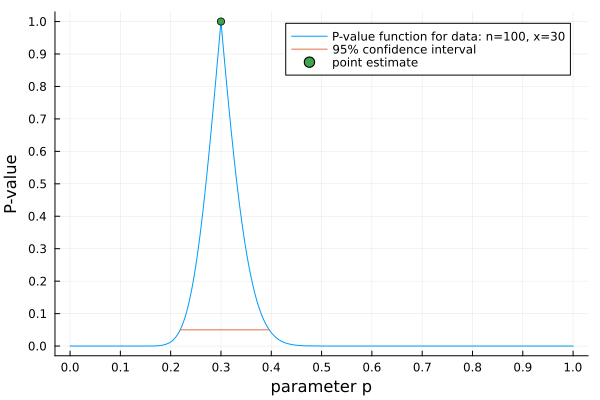

In [4]:
ci95 = find_zeros(p -> pvalue_normal_approx(Binomial(100, p), 30) - 0.05, 0, 1)
@show ci95

plot(p -> pvalue_normal_approx(Binomial(100, p), 30), 0, 1;
    label="P-value function for data: n=100, x=30")
plot!(xtick=0:0.1:1, ytick=0:0.1:1)
plot!(xguide="parameter p", yguide="P-value")
plot!(ci95, fill(0.05, 2); label="95% confidence interval")
scatter!([30/100], [1]; label="point estimate")

nulldist = Poisson(30) = Poisson{Float64}(λ=30.0)
probability of P-value ≤ 5% = 0.053829


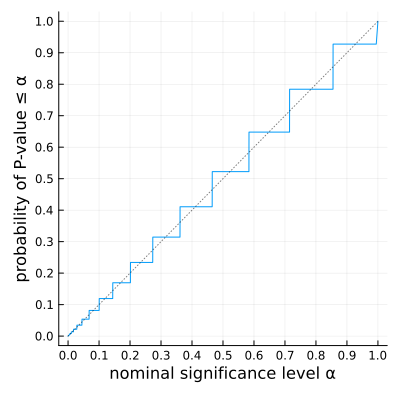

In [5]:
@show nulldist = Poisson(30)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = NegativeBinomial(30, 0.7) = NegativeBinomial{Float64}(r=30.0, p=0.7)
probability of P-value ≤ 5% = 0.043354


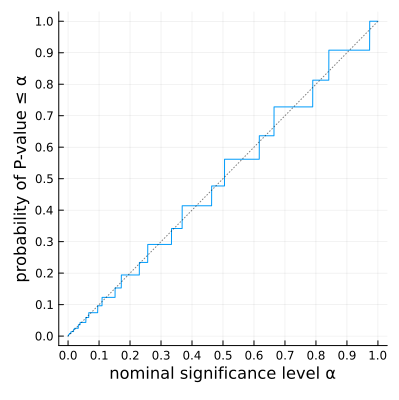

In [6]:
@show nulldist = NegativeBinomial(30, 0.7)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = NegativeBinomial(30, 0.7) = NegativeBinomial{Float64}(r=30.0, p=0.7)
altdist = NegativeBinomial(30, 0.5) = NegativeBinomial{Float64}(r=30.0, p=0.5)
probability of P-value ≤ 5% = 0.869267


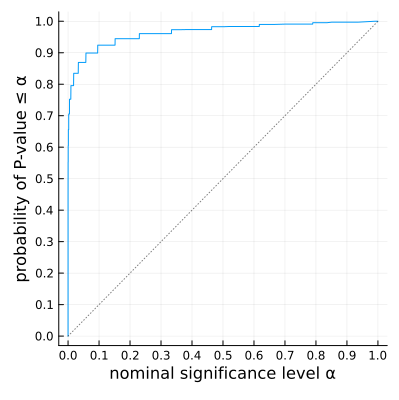

In [7]:
@show nulldist = NegativeBinomial(30, 0.7)
@show altdist = NegativeBinomial(30, 0.5)
X = rand(altdist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Hypergeometric(200, 200, 200) = Hypergeometric(ns=200, nf=200, n=200)
probability of P-value ≤ 5% = 0.057518


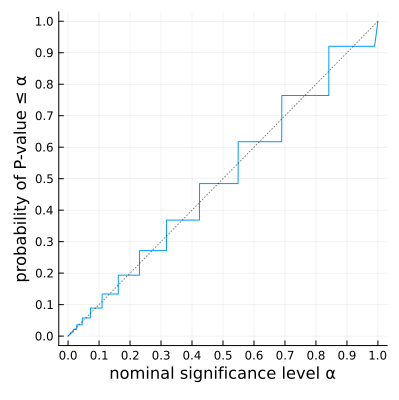

In [8]:
@show nulldist = Hypergeometric(200, 200, 200)
X = rand(nulldist, 10^6)
pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

nulldist = Hypergeometric(200, 200, 200) = Hypergeometric(ns=200, nf=200, n=200)
altdist = FisherNoncentralHypergeometric(200, 200, 200, 1.8) = FisherNoncentralHypergeometric{Float64}(ns=200, nf=200, n=200, ω=1.8)
  0.004993 seconds (5 allocations: 781.391 KiB)
probability of P-value ≤ 5% = 0.8471


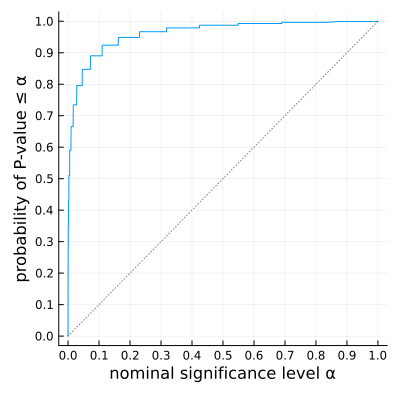

In [9]:
@show nulldist = Hypergeometric(200, 200, 200)
@show altdist = FisherNoncentralHypergeometric(200, 200, 200, 1.8)
X = rand(altdist, 10^5)
@time pval = pvalue_normal_approx.(nulldist, X)
F_pval = make_ecdf(pval)

println("probability of P-value ≤ 5% = ", F_pval(0.05))

plot_ecdf_pval(F_pval)

p_value_of_OR_equals_1 = 0.01250182618210326
point_estimate = 1.6514949683596007
confint95 = [1.1136077150953616, 2.4491882634850097]


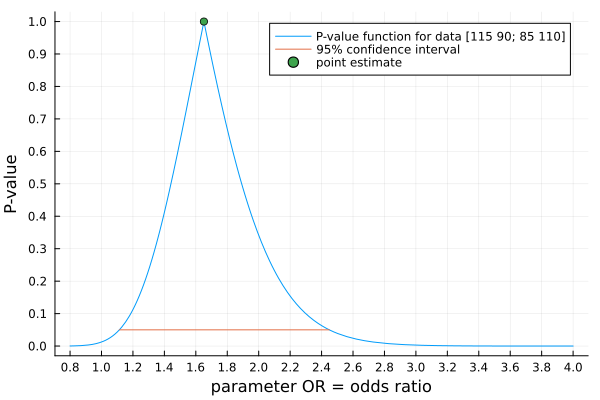

In [10]:
A = [
    115 85
    90 110
]
a, b, c, d = A'

p_value_of_OR_equals_1 = pvalue_normal_approx(Hypergeometric(a+b, c+d, a+c), a)

o = optimize(OR -> -pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), a), 0.1, 10)
point_estimate = o.minimizer

confint95 = find_zeros(0.1, 10) do OR
    pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), a) - 0.05
end

@show p_value_of_OR_equals_1 point_estimate confint95

plot(OR -> pvalue_normal_approx(FisherNoncentralHypergeometric(a+b, c+d, a+c, OR), 115), 0.8, 4;
    label="P-value function for data $(A')")
plot!(xtick=0:0.2:5, ytick=0:0.1:1)
plot!(xguide="parameter OR = odds ratio", yguide="P-value")
plot!(confint95, fill(0.05, 2); label="95% confidence interval")
scatter!([point_estimate], [1]; label="point estimate")